In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '0.99',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 1,
})
palette = sns.color_palette("Set2", 10)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.2)

def plot_neuron(name):
    data = pd.read_csv('./tests/results/%s.csv' % name, index_col=0)
    data[["I", "V", "u"]].plot(style=["-", "-", "--"], title=name)

    spikes = data["spike"]
    spikes = spikes[spikes != 0]
    spikes.plot(style=["."])

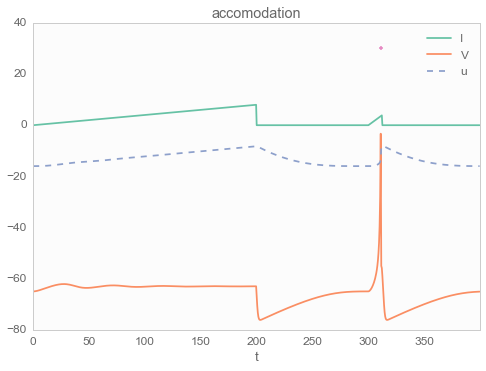

In [2]:
plot_neuron("accomodation")

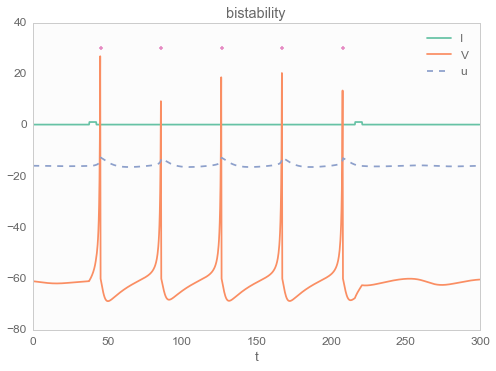

In [3]:
plot_neuron("bistability")

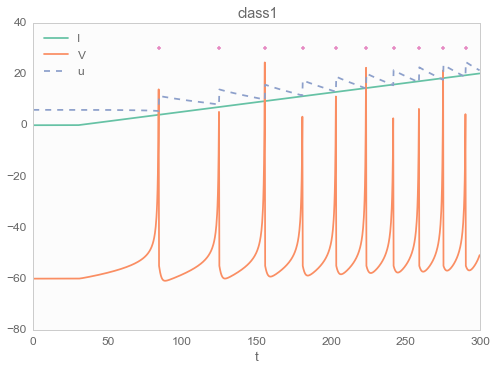

In [4]:
plot_neuron("class1")

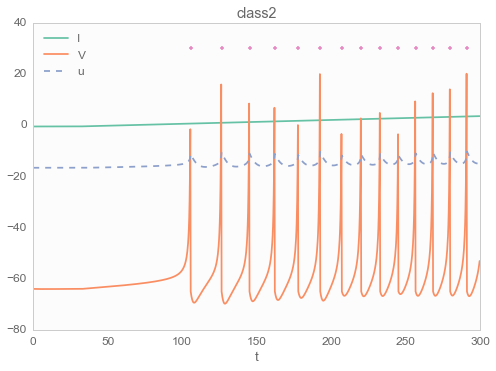

In [5]:
plot_neuron("class2")

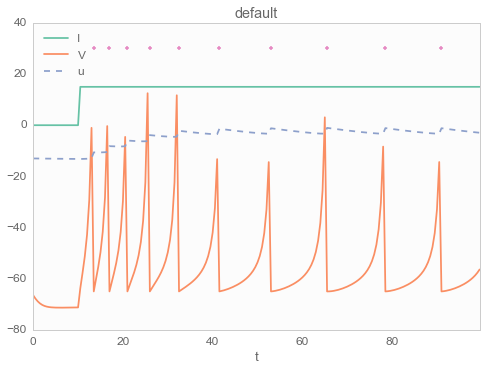

In [6]:
plot_neuron("default")

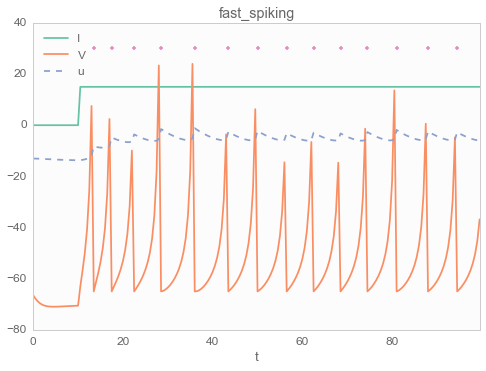

In [7]:
plot_neuron("fast_spiking")

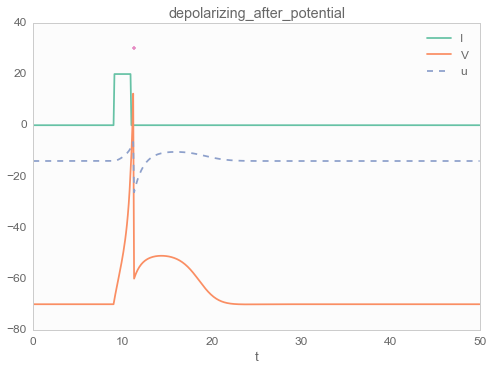

In [8]:
plot_neuron("depolarizing_after_potential")

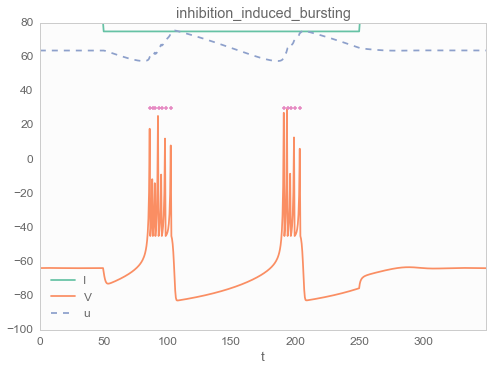

In [9]:
plot_neuron("inhibition_induced_bursting")

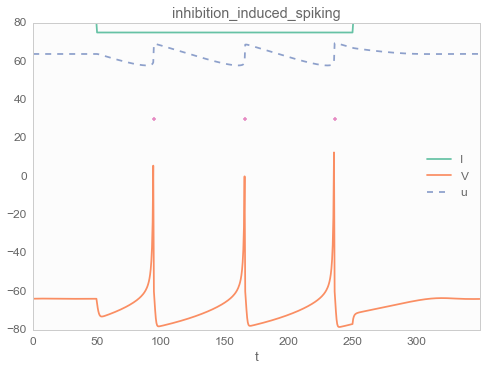

In [10]:
plot_neuron("inhibition_induced_spiking")

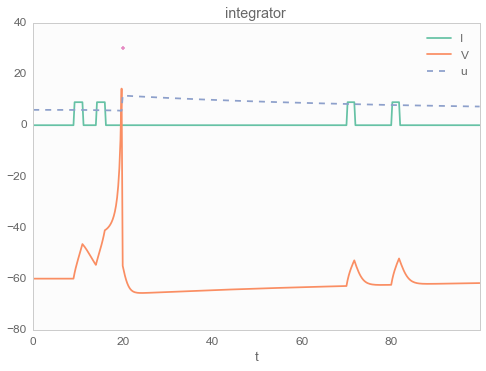

In [11]:
plot_neuron("integrator")

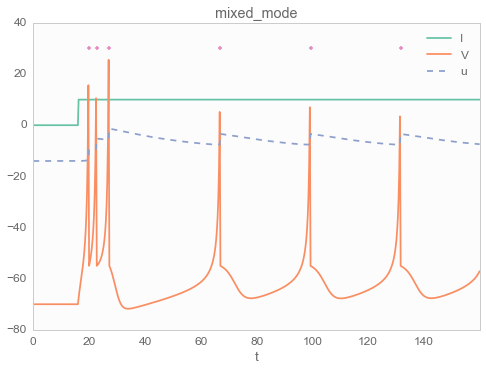

In [12]:
plot_neuron("mixed_mode")

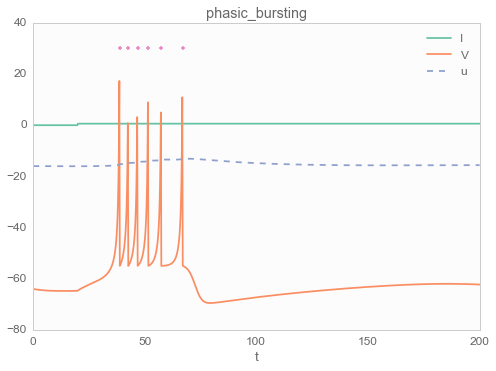

In [13]:
plot_neuron("phasic_bursting")

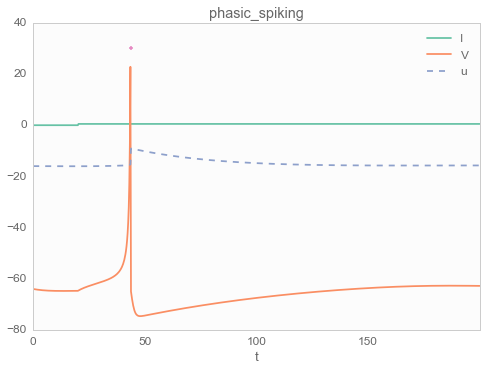

In [14]:
plot_neuron("phasic_spiking")

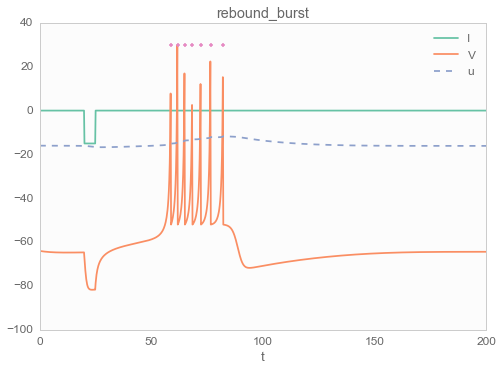

In [15]:
plot_neuron("rebound_burst")

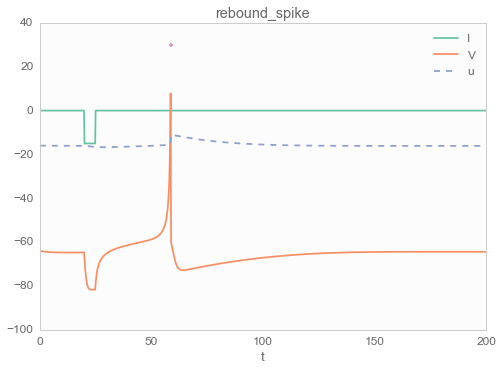

In [16]:
plot_neuron("rebound_spike")

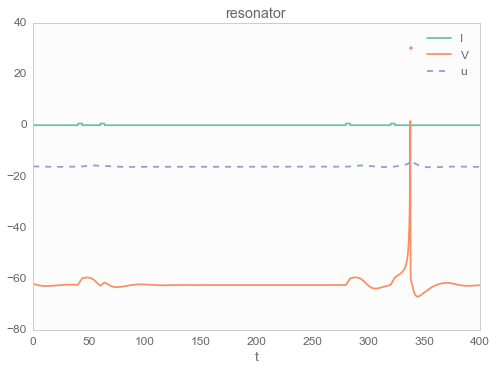

In [17]:
plot_neuron("resonator")

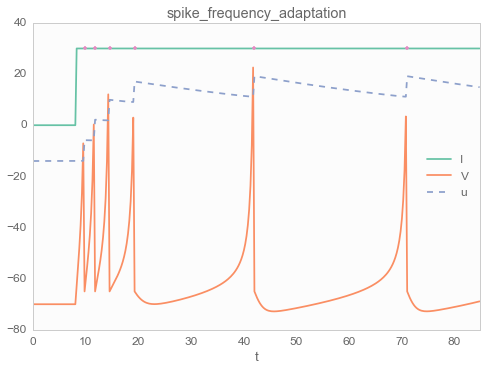

In [18]:
plot_neuron("spike_frequency_adaptation")

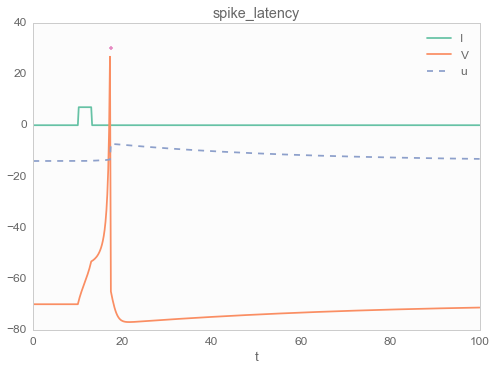

In [19]:
plot_neuron("spike_latency")

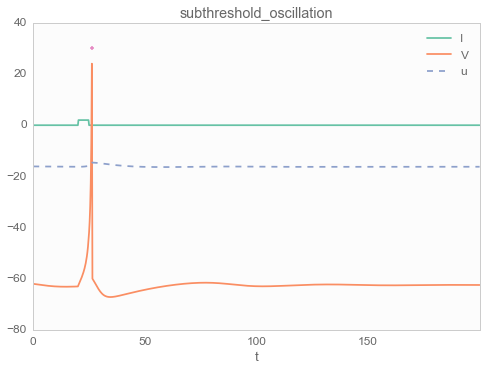

In [20]:
plot_neuron("subthreshold_oscillation")

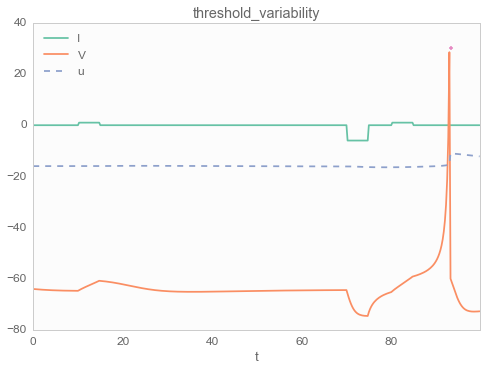

In [21]:
plot_neuron("threshold_variability")

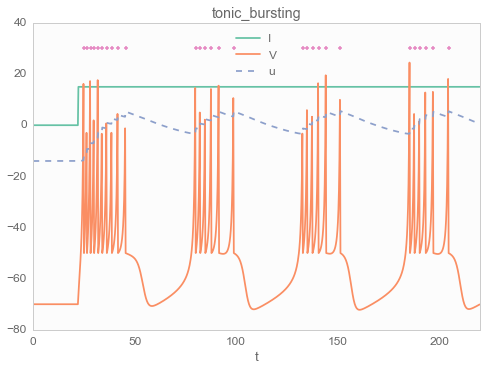

In [22]:
plot_neuron("tonic_bursting")

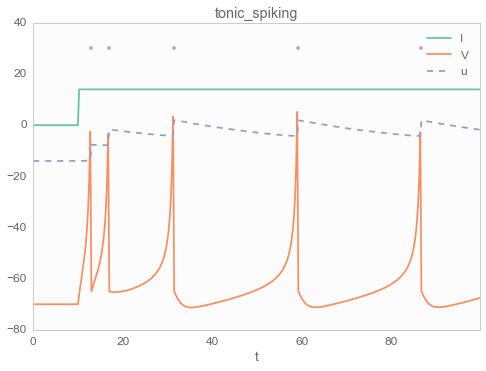

In [23]:
plot_neuron("tonic_spiking")

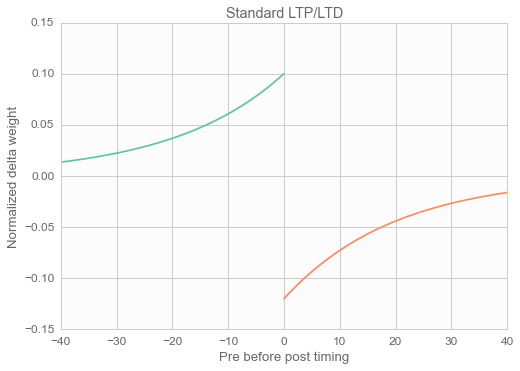

In [24]:
ltp = pd.read_csv('./tests/results/stdp_ltp.csv')
ltd = pd.read_csv('./tests/results/stdp_ltd.csv')

plt.plot(ltp["t"], ltp["d"])
plt.plot(ltd["t"], ltd["d"])

plt.grid()
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("Standard LTP/LTD")

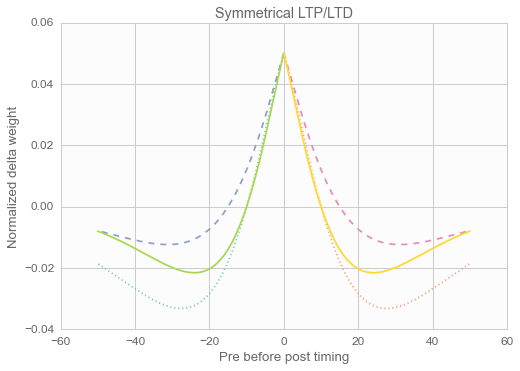

In [25]:
ltp = pd.read_csv('./tests/results/sym_ltp.csv')
ltd = pd.read_csv('./tests/results/sym_ltd.csv')

ltp1 = pd.read_csv('./tests/results/sym_ltp_1.csv')
ltd1 = pd.read_csv('./tests/results/sym_ltd_1.csv')

ltp2 = pd.read_csv('./tests/results/sym_ltp_2.csv')
ltd2 = pd.read_csv('./tests/results/sym_ltd_2.csv')

plt.plot(ltp1["t"], ltp1["d"], ":")
plt.plot(ltd1["t"], ltd1["d"], ":")

plt.plot(ltp2["t"], ltp2["d"], "--")
plt.plot(ltd2["t"], ltd2["d"], "--")

plt.plot(ltp["t"], ltp["d"], "-")
plt.plot(ltd["t"], ltd["d"], "-")

plt.grid()
plt.xlabel("Pre before post timing")
plt.ylabel("Normalized delta weight")
plt.title("Symmetrical LTP/LTD")

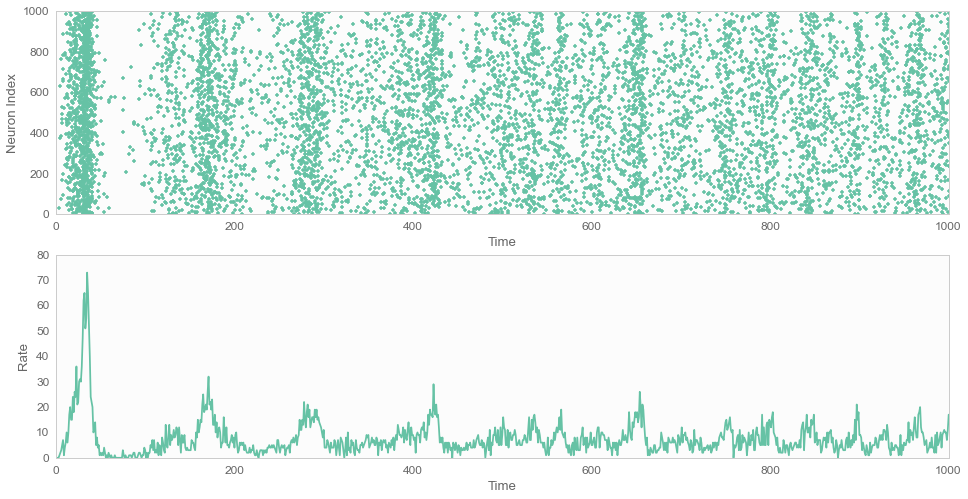

In [26]:
spikes = pd.read_csv('./examples/results/spikes.csv')
rates = pd.read_csv('./examples/results/spikes_rate.csv')

plt.figure(figsize=(16,8))
plt.title("Spiking Network")

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(spikes["t"], spikes["i"], ".")
ax1.set_xlabel("Time")
ax1.set_ylabel("Neuron Index")

ax2.plot(rates["t"], rates["rate"])
ax2.set_xlabel("Time")
ax2.set_ylabel("Rate")

In [27]:
palette = sns.color_palette("Set1", 10)

def plot_window(spikes, rates, t_offset, t_window):
    spikes = spikes[(spikes['t'] > t_offset) & (spikes['t'] < t_offset + t_window)]
    rates = rates[(rates['t'] > t_offset) & (rates['t'] < t_offset + t_window)]

    plt.figure(figsize=(16,8))
    plt.title("STDP Network")

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)

    exc_spikes = spikes[spikes["i"] < 800]
    inh_spikes = spikes[spikes["i"] >= 800]
    ax1.plot(exc_spikes["t"], exc_spikes["i"], ",")
    ax1.plot(inh_spikes["t"], inh_spikes["i"], ",")
    ax1.set_title(t_offset)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Neuron Index")

    ax2.plot(rates["t"], rates["rate"])
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Rate")

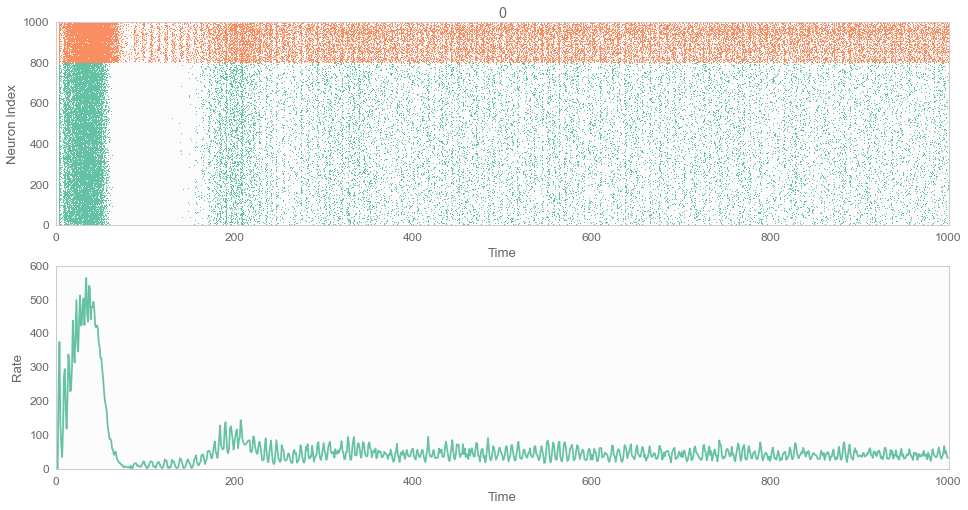

In [28]:
spikes = pd.read_csv('./examples/results/stdp.csv')
rates = pd.read_csv('./examples/results/stdp_rate.csv')

window_limit = 1000
window_size = 1000

window_offset = 0
while True:
    plot_window(spikes, rates, window_offset, window_size)
    window_offset += window_size
    if window_offset >= window_limit:
        break